In [ ]:
import pandas as pd
def fetch_train(name):
    filename = "./../Dataset/" + name + ".csv"
    df = pd.read_csv(filename)
    return df

In [2]:
train_1 = fetch_train("train_1").fillna(0)
train_2 = fetch_train("train_2").fillna(0)

In [7]:
import stumpy
from dask.distributed import Client

In [8]:
dask_client = Client()

In [107]:
your_time_series = train_1.loc[1][1:]
your_time_series = np.asarray(your_time_series,dtype=np.float64)
pattern = np.asarray(your_time_series,dtype=np.float64)
window_size_list=[7,30,365]

Window Size:  7
Window Size:  30
Window Size:  365


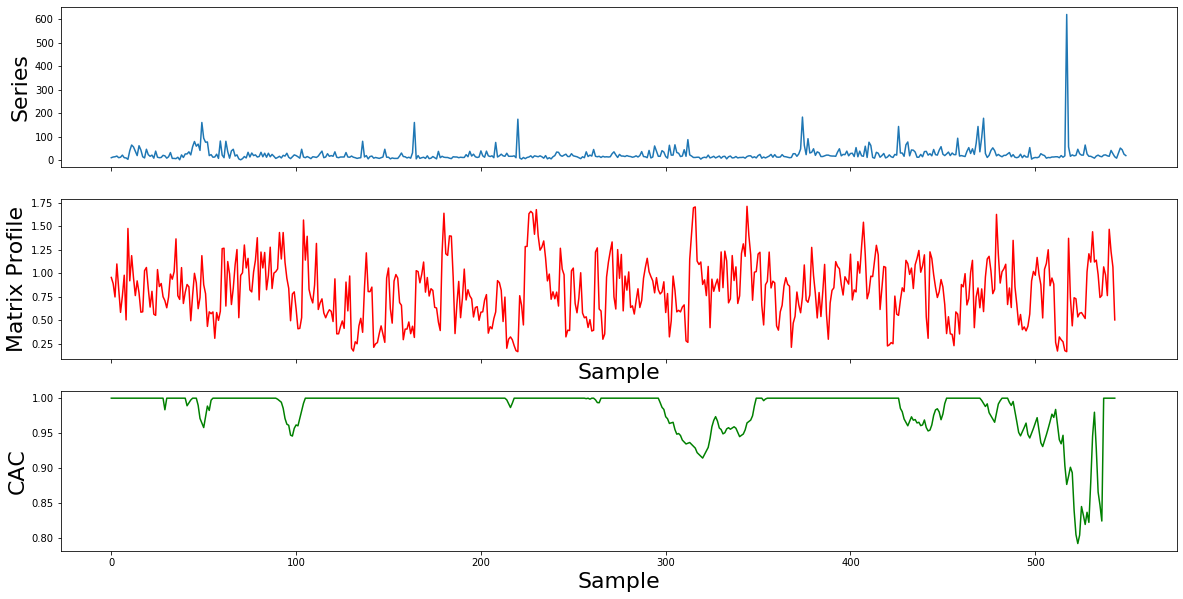

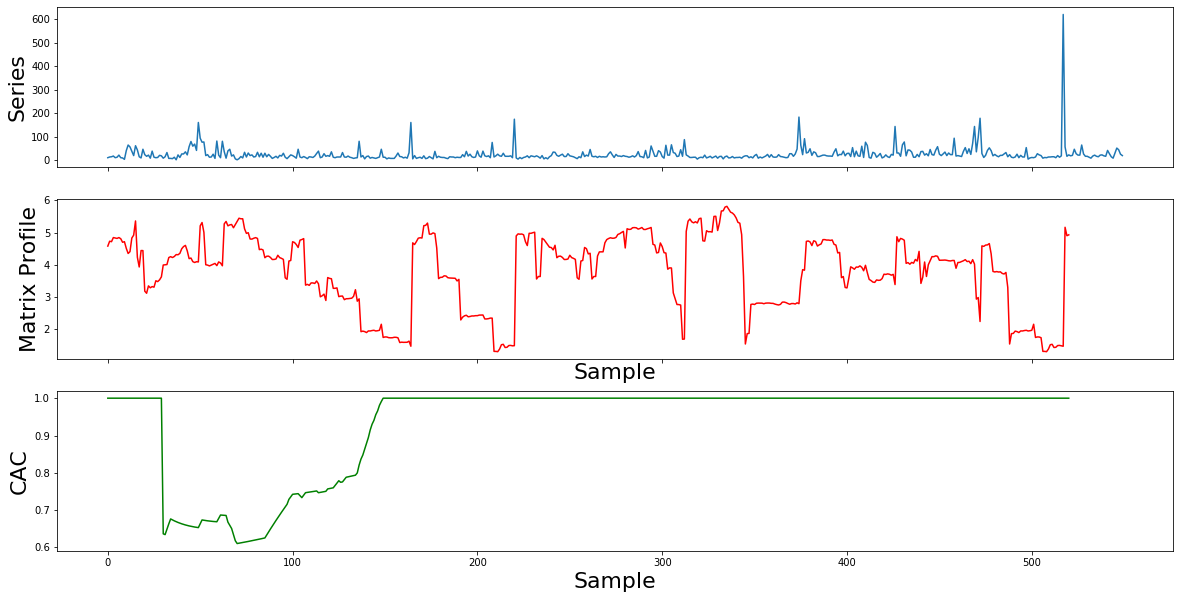

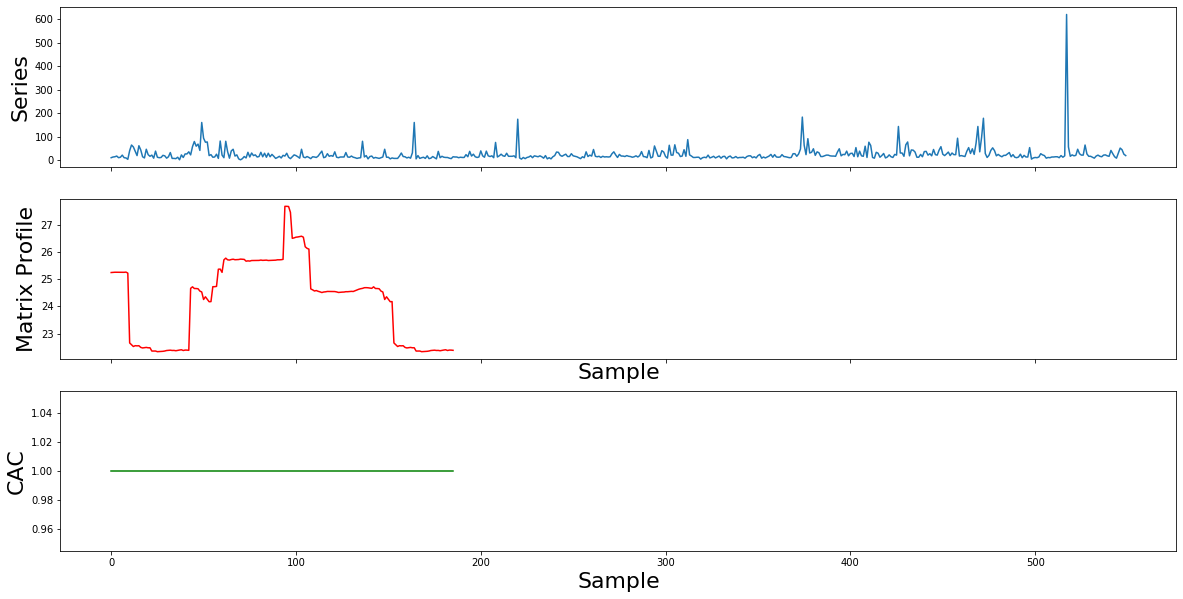

In [110]:
for window_size in window_size_list:
    print("Window Size: ",window_size)
    m=window_size
    mp = stumpy.stumped(dask_client, your_time_series, m=window_size)
    mp = pd.DataFrame(mp)
    from matrixprofile import *
    # Bonus: calculate the corrected arc curve (CAC) to do semantic segmantation.
    cac = fluss.fluss(mp[1], window_size)
    #Append np.nan to Matrix profile to enable plotting against raw data
    mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

    #Plot the signal data
    fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=(20,10))
    ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data");
    ax1.set_ylabel('Series', size=22)

    #Plot the Matrix Profile
    ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red');
    ax2.set_ylabel('Matrix Profile', size=22)
    ax2.set_xlabel('Sample', size=22)

    #Plot the CAC
    ax3.plot(np.arange(len(cac)),cac, label="CAC", color='green');
    ax3.set_ylabel('CAC', size=22)
    ax3.set_xlabel('Sample', size=22)